# ROC

[參考網站 : 淺談機器學習的效能衡量指標 (2) -- ROC/AUC 曲線](https://ithelp.ithome.com.tw/articles/10229049)

ROC曲線是由真陽率(TPR)和假陽率(FPR)所繪製的, 而 AUC 則是 ROC曲線 下的面積.
* TPR = $\frac{TP}{TP+FN} = \frac{TP}{P}$ : 預測事件發生且真的事件發生 / 真實事件發生數
* FPR = $\frac{FP}{FP+TN} = \frac{FP}{N}$ : 預測事件發生但事件沒有發生 / 事件不會發生
* 其中, TP為真陽性, TN為真陰性, P和N是真實的陽性和陰性的數量.

[圖片來源](https://medium.com/nlp-tsupei/roc-pr-%E6%9B%B2%E7%B7%9A-f3faa2231b8c)

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*WAgW7LiQ0U8L0Jd22gpJyw.png" width="30%" height="30%">

[圖片來源](https://ithelp.ithome.com.tw/articles/10229049)

此圖可以更好理解FP和FN的由來.

<img src="https://d1dwq032kyr03c.cloudfront.net/upload/images/20191117/20001976ciSg6wu8OQ.png" width="40%" height="40%">

# AUC

就是 ROC 下的面積, [參考網站](https://medium.com/nlp-tsupei/roc-pr-%E6%9B%B2%E7%B7%9A-f3faa2231b8c)通常

1. AUC = 0.5 (no discrimination 無鑑別力)
2. 0.7≦AUC≦0.8 (acceptable discrimination 可接受的鑑別力)
3. 0.8≦AUC≦0.9 (excellent discrimination 優良的鑑別力)
4. 0.9≦AUC≦1.0 (outstanding discrimination 極佳的鑑別力)

## ROC 曲線繪製方法

0. 此前提是若真實值為 1 時機率值越大.
1. 將得到的機率值由大到小排序, 並且計算真實的 P 和 N 的數量
2. 排序完後全部結果都猜1, 和真實結果比較. 若開始的真實結果是1, 則直到真實結果變成 0 前都是往上, 變 0 後直到變 1 都是往右.

## AUC 計算方法

當TPR停止改變時, 假設停止改變時的值為a, 計算 a * (TPR下次改變時的FPR - TPR改變到a時的FPR), 計算所有的加總.

或是

計算 sum[ TPR[i+1]*(FPR[i+1] - FPR[i])], i in [1,P+N-1]

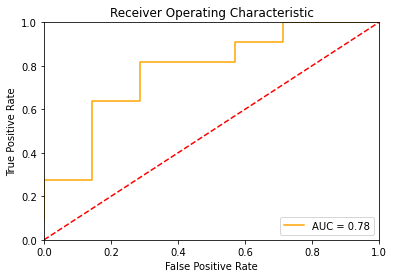

In [49]:
import pandas as pd

# 讀取資料
df = pd.read_csv('eg1.csv')

# 將資料依照機率值從大到小重新排序
df = df.sort_values(by = 'predict', ascending = False)
df_p = df['actual'].values

# 計算 P 和 N
P = df[df['actual'] == 1].shape[0]
N = df[df['actual'] == 0].shape[0]

# 給定起始值
TPR = [0] # 起始值先設個0, 之後計算就不用再多設一個參數.
FPR = [0]

# 依照每點去尋找 ROC 的路徑
for i in range(P+N):
    if df_p[i] == 1:
        TPR.append(TPR[i] + 1/P)
        FPR.append(FPR[i])
    else:
        TPR.append(TPR[i])
        FPR.append(FPR[i] + 1/N)
TPR = TPR[1:] # 刪掉一開始的0
FPR = FPR[1:]
AUC = 0
for i in range(P+N-1):
    AUC += (TPR[i+1])*(FPR[i+1]-FPR[i])

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, color = 'orange', label = 'AUC = %0.2f' % AUC) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

### 直接使用套件計算

[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ] [0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ] [ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


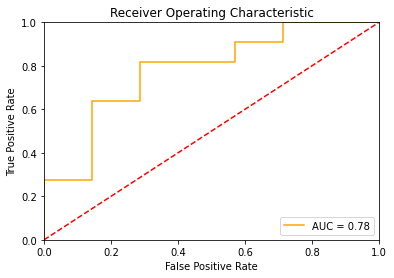

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 讀取資料
import pandas as pd
df=pd.read_csv('eg1.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(fpr, tpr, threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

## Delong test

Delong test 用於測試兩個以上的 ROC曲線 是否相似. H0 : 相似

### R code

```R
#install.packages("pROC")

library(pROC)

# 创建两个模型的预测值和真实标签
predictions_model1 <- c(0.8, 0.85, 0.9, 0.88, 0.92)
predictions_model2 <- c(0.75, 0.82, 0.88, 0.78, 0.91, 0.87, 0.90)
labels1 <- c(1, 0, 1, 0, 1)  # 对应的真实标签，1 表示正例，0 表示负例
labels2 <- c(0, 1, 1, 0, 1, 0, 1)  # 对应的真实标签，1 表示正例，0 表示负例

# 计算两个模型的 ROC 曲线
roc_model1 <- roc(labels1, predictions_model1, levels=c(0, 1))
roc_model2 <- roc(labels2, predictions_model2, levels=c(0, 1))

# 执行 Delong's 检验
roc.test(roc_model1, roc_model2, method = 'delong')
```